<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
data = pd.read_csv("teleCust.csv")
print("Dataset loaded successfully!")
print("Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nMissing values per column:")
print(data.isnull().sum())
data = data.fillna(data.mean(numeric_only=True))
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

Dataset loaded successfully!
Shape: (1000, 12)

First 5 rows:
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  

Missing values per column:
region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
param_grid = {'n_neighbors': np.arange(1, 21)}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

best_k = grid.best_params_['n_neighbors']
print(f"\nBest number of neighbors (k): {best_k}")


Best number of neighbors (k): 16


In [6]:
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {acc*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 35.50%

Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.42      0.41        60
           2       0.29      0.26      0.27        39
           3       0.41      0.53      0.46        55
           4       0.22      0.15      0.18        46

    accuracy                           0.35       200
   macro avg       0.33      0.34      0.33       200
weighted avg       0.34      0.35      0.34       200



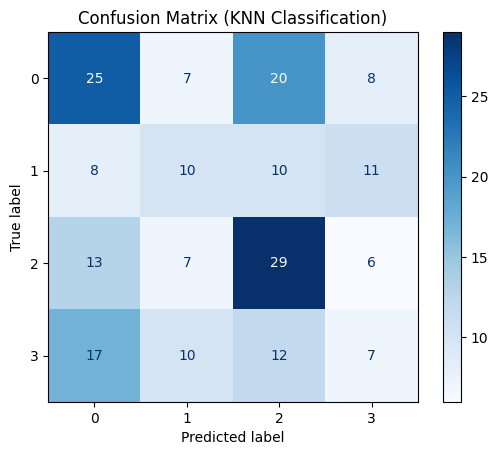

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (KNN Classification)")
plt.show()

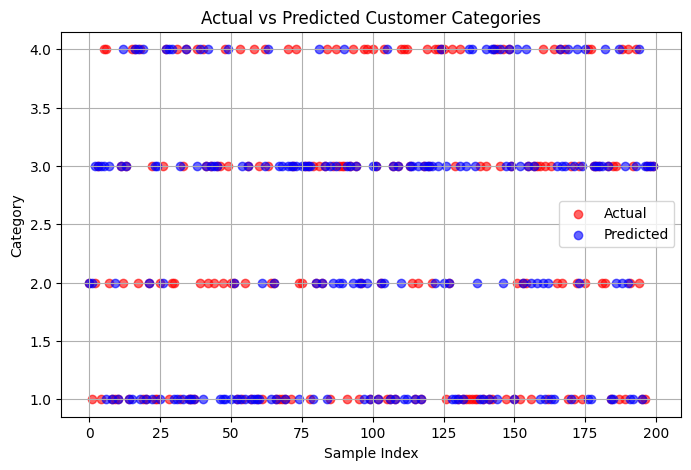

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, color='red', alpha=0.6, label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='blue', alpha=0.6, label='Predicted')
plt.title("Actual vs Predicted Customer Categories")
plt.xlabel("Sample Index")
plt.ylabel("Category")
plt.legend()
plt.grid(True)
plt.show()